<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ПОДГОТОВКА-ДАННЫХ" data-toc-modified-id="ПОДГОТОВКА-ДАННЫХ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ПОДГОТОВКА ДАННЫХ</a></span><ul class="toc-item"><li><span><a href="#Загрузим-датасет,-познакомимся-с-данными" data-toc-modified-id="Загрузим-датасет,-познакомимся-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузим датасет, познакомимся с данными</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Выполним-ресемплирование-по-одному-часу" data-toc-modified-id="Выполним-ресемплирование-по-одному-часу-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выполним ресемплирование по одному часу</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Проверка-хронологического-порядка" data-toc-modified-id="Проверка-хронологического-порядка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка хронологического порядка</a></span></li><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Скользящее среднее</a></span></li><li><span><a href="#Тренд" data-toc-modified-id="Тренд-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тренд</a></span></li><li><span><a href="#Сезонности" data-toc-modified-id="Сезонности-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Сезонности</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Деление-на-выборки" data-toc-modified-id="Деление-на-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Деление на выборки</a></span></li><li><span><a href="#Признаки-и-целевой-признак" data-toc-modified-id="Признаки-и-целевой-признак-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Признаки и целевой признак</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li><li><span><a href="#Предсказания-и-целевой-признак-на-графике" data-toc-modified-id="Предсказания-и-целевой-признак-на-графике-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Предсказания и целевой признак на графике</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## ПОДГОТОВКА ДАННЫХ

---

---

### Загрузим датасет, познакомимся с данными

---

---

**Импортируем нужные библиотеки:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

**Объявим константу:**

In [2]:
RS = 123

**Загрузим датасет:**

In [3]:
try:
    df = pd.read_csv('taxi.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv')

**Посмотрим на данные:**

In [4]:
df.head(3)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


---

---

### Обработка дубликатов

---

---

In [6]:
df.duplicated().sum()

0

**Явных дубликатов не обнаружили.**

---

---

**Промежуточный вывод:**

**В датасете присутствуют данные 2х типов, object и int64.**

**Датасет без пропусков**

**В датасете 2 колонки:**
- datetime - дата
- num_orders - число заказов

---

---

### Выполним ресемплирование по одному часу

---

---

**Изменим тип данных в колонке datetime с object на datetime64 и установим индекс таблицы равным столбцу datetime:**

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

**Отсортируем индексы таблицы:**

In [8]:
df.sort_index(inplace=True)

**Ресемплируем по 1-му часу, возьмем средние значения:**

In [9]:
df = df.resample('1H').sum()

**Посмотрим на график:**

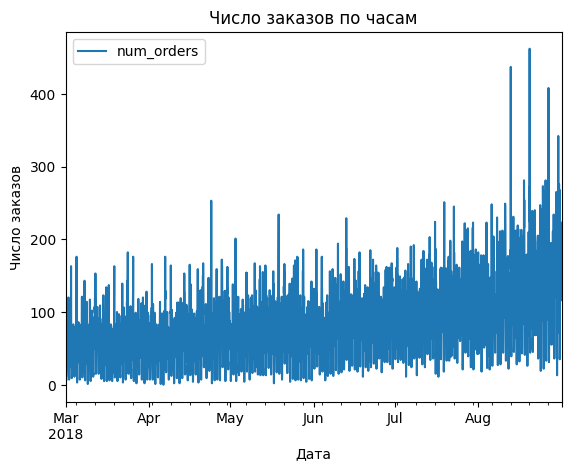

In [10]:
df.plot()
plt.title('Число заказов по часам')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.show()

---

---

### Промежуточный вывод

**Исследовали датасет, выяснили что нет пропусков и дубликатов.**

**Сделали ресемплирование по 1-му часу.**

---

---

## Анализ

---

---

### Проверка хронологического порядка

In [11]:
df.index.is_monotonic

True

**Выяснили, что данные расположены в хранологическом порядке.**

---

---

### Скользящее среднее

---

---

**Добавим колонку со скользящим средним и построим график:**

In [12]:
df['rolling_mean'] = df.rolling(24).mean()

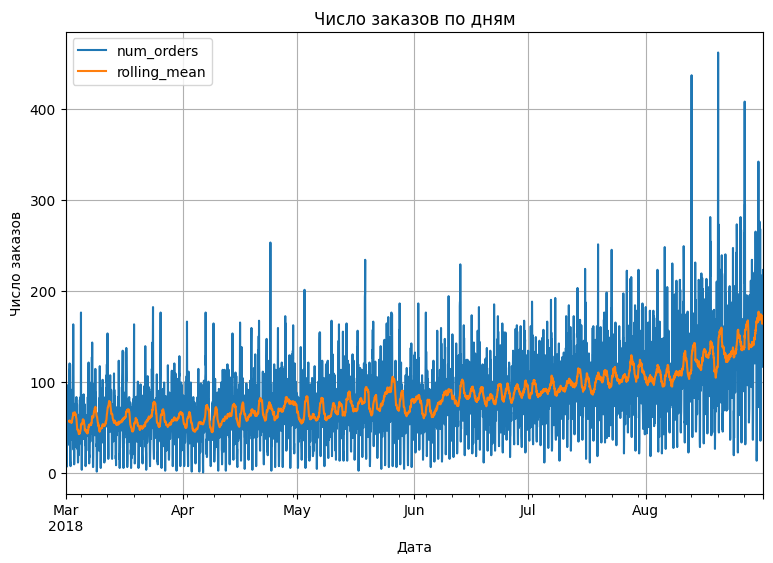

In [13]:
df.plot(grid=True, figsize=(9, 6))
plt.title('Число заказов по дням')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.show()

**Видим, что есть тренд на плавное увеличение среднего кол-ва заказов к концу лета.**

---

---

### Тренд

---

---

**Применим функцию seasonal_decompose() для разложоения временного ряда на состовляющие и посмотрим их:**

In [14]:
decomposed = seasonal_decompose(df['num_orders'])

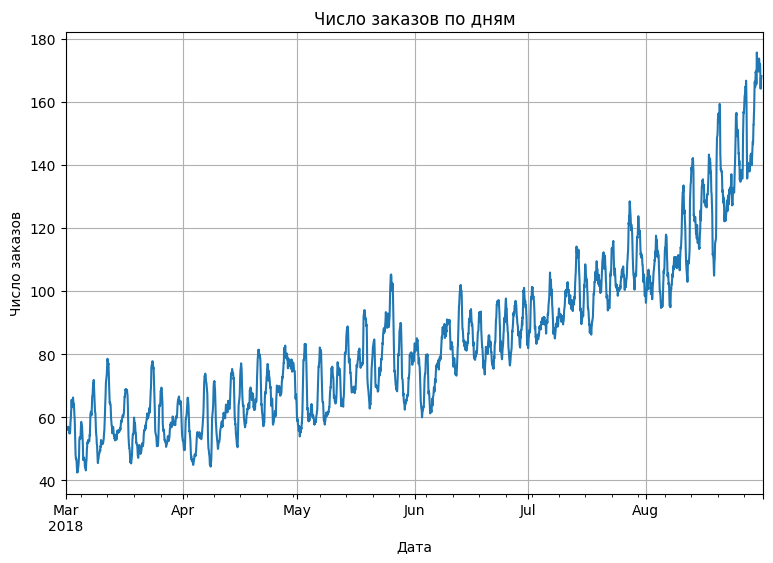

In [15]:
decomposed.trend.plot(grid=True, figsize=(9, 6))
plt.title('Число заказов по дням')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.show()

---

---

### Сезонности

---

---

**Посмотрим разные виды сезонностей:**

**Внутридневная сезонность:**

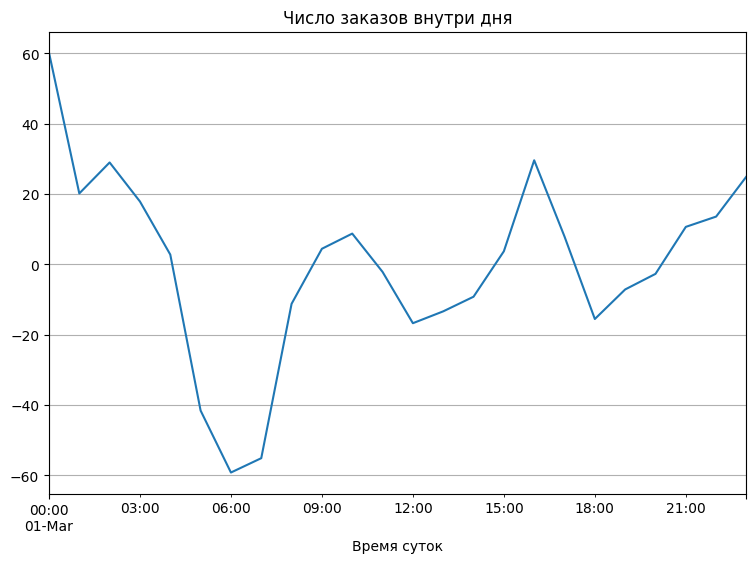

In [16]:
decomposed.seasonal['2018-03-01':'2018-03-01'].plot(grid=True, figsize=(9, 6))
plt.title('Число заказов внутри дня')
plt.xlabel('Время суток')
plt.show()

---

---

**Посмотрим дневную сезонность за 1 неделю, для этого ресемплируем ряд по 1-му дню, возьмем полную неделю и построим график:**

In [17]:
df_res_1d = df.resample('1D').sum()
decomposed_1d = seasonal_decompose(df_res_1d['num_orders'])

**Найдем понедельник, применим .index.dayofweek и найдем день с индексом "0":**

In [18]:
df_res_1d.index.dayofweek

Int64Index([3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
            ...
            2, 3, 4, 5, 6, 0, 1, 2, 3, 4],
           dtype='int64', name='datetime', length=184)

**Выяснили, что понедельник это 5 марта, возьмем неделю с 5 по 11 марта:**

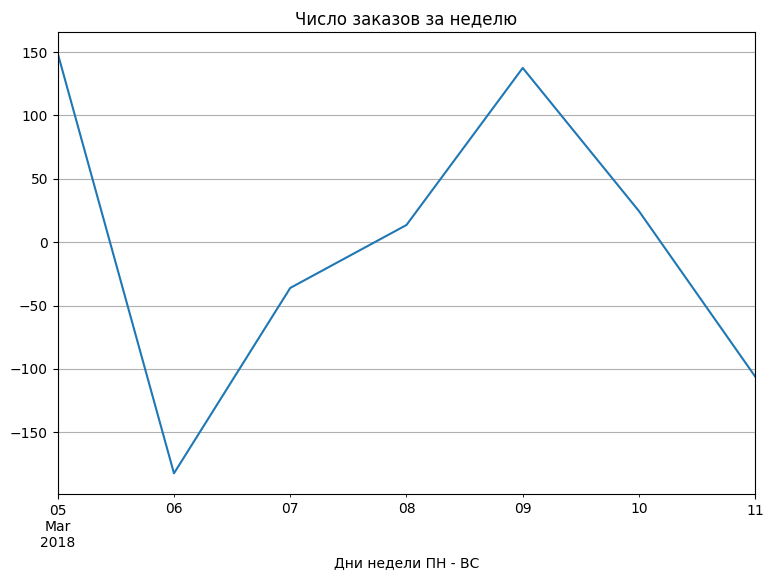

In [19]:
decomposed_1d.seasonal['2018-03-05':'2018-03-11'].plot(grid=True, figsize=(9, 6))
plt.title('Число заказов за неделю')
plt.xlabel('Дни недели ПН - ВС')
plt.show()

---

---

### Промежуточный вывод

**Сделали проверку хронологического порядка.**

**Добавили колонку со скользящим средним.**

**Выяснили что присутствует 1 восходящий тренд по всем данным.**

**Выяснили, что перед нами нестационарный временной ряд.**

**Построили графики внутрисуточной и дневной сезонности, выяснили что:**
- максимум заказов с 21:00 до 03:00, можно предположить - это связано с отсутствием общественного транспорта в это время суток
- с 05:00 до 07:00 заказов минимум, предпологаем - люди преимщественно спят
- в течении дня среднее кол-во заказов с небольшими отклонениями
- в ПН и ПТ кол-во заказов сильно выше чем в другие дни
- во ВТ и ВС самое низкое кол-во заказов

---

---

## Обучение

---

---

**Создадим дополнительные признаки в датасете, час, день недели, несколько колонок с отстающими значениями, колонка со скользящим средним уже создана:**

In [20]:
def add_feature(data, lag):
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    
    for i in range(1, lag + 1):
        data['lag_{}'.format(i)] = data['num_orders'].shift(i)

In [21]:
add_feature(df, 2)

**Проверим результат:**

In [22]:
df.head(3)

,num_orders,rolling_mean,hour,dayofweek,lag_1,lag_2
datetime,,,,,,
2018-03-01 00:00:00,124,NaN,0,3,NaN,NaN
2018-03-01 01:00:00,85,NaN,1,3,124.0,NaN
2018-03-01 02:00:00,71,NaN,2,3,85.0,124.0


---

---

### Деление на выборки

---

---

In [23]:
train, test = train_test_split(df, shuffle=False, test_size=0.1, random_state=RS)

In [24]:
train.head()

,num_orders,rolling_mean,hour,dayofweek,lag_1,lag_2
datetime,,,,,,
2018-03-01 00:00:00,124,NaN,0,3,NaN,NaN
2018-03-01 01:00:00,85,NaN,1,3,124.0,NaN
2018-03-01 02:00:00,71,NaN,2,3,85.0,124.0
2018-03-01 03:00:00,66,NaN,3,3,71.0,85.0
2018-03-01 04:00:00,43,NaN,4,3,66.0,71.0


**В обучеющей выборке есть пропущенные значения, они образовались при создании дополнительных признаков, удалим несколько строк с пропущенными значениями:**

In [25]:
train = train.dropna()

**Для подбора гиперпараметров и кросс-валижации будем использовать TimeSeriesSplit в качестве параметра cv.**

In [26]:
tss = TimeSeriesSplit(n_splits=8)

---

---

### Признаки и целевой признак

---

---

**Выделим признаки и целевой признак в выборках:**

In [27]:
feature_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']

feature_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

**Проверим результат:**

In [28]:
feature_train.head()

,rolling_mean,hour,dayofweek,lag_1,lag_2
datetime,,,,,
2018-03-01 23:00:00,56.833333,23,3,113.0,66.0
2018-03-02 00:00:00,55.416667,0,4,58.0,113.0
2018-03-02 01:00:00,56.875000,1,4,90.0,58.0
2018-03-02 02:00:00,57.041667,2,4,120.0,90.0
2018-03-02 03:00:00,56.958333,3,4,75.0,120.0


In [29]:
target_train.head()

datetime
2018-03-01 23:00:00     58
2018-03-02 00:00:00     90
2018-03-02 01:00:00    120
2018-03-02 02:00:00     75
2018-03-02 03:00:00     64
Freq: H, Name: num_orders, dtype: int64

---

---

### Решающее дерево

---

---

In [30]:
def dtr_rmse(x_train, y_train):
    model = DecisionTreeRegressor(random_state=RS)
    
    parametrs = {'max_depth': range (1, 21, 5), 
                 'min_samples_split': range (2, 21, 2)}
    
    model_dtr = GridSearchCV(model, parametrs, cv=tss, scoring = 'neg_root_mean_squared_error', n_jobs=-1)
    model_dtr.fit(x_train, y_train)
    return model_dtr

In [31]:
model_dtr = dtr_rmse(feature_train, target_train)
print('Лучшие параметры модели =', model_dtr.best_params_, 'RMSE = ', model_dtr.best_score_ * -1)

Лучшие параметры модели = {'max_depth': 11, 'min_samples_split': 20} RMSE =  26.865980536471227


---

---

### Случайный лес

In [32]:
def rfr_rmse(x_train, y_train):
    model = RandomForestRegressor(random_state=RS)
    
    parametrs = {'n_estimators': range (10, 21, 5),
                 'max_depth': range (1, 21, 5), 
                 'min_samples_split': range (2, 21, 2)}
    
    model_rfr = GridSearchCV(model, parametrs, cv=tss, scoring = 'neg_root_mean_squared_error', n_jobs=-1)
    model_rfr.fit(x_train, y_train)
    return model_rfr

In [33]:
%%time
model_rfr = rfr_rmse(feature_train, target_train)
print('Лучшие параметры модели =', model_rfr.best_params_, 'RMSE = ', model_rfr.best_score_ * -1)

Лучшие параметры модели = {'max_depth': 16, 'min_samples_split': 14, 'n_estimators': 20} RMSE =  23.768753132522463
CPU times: user 1.66 s, sys: 123 ms, total: 1.79 s
Wall time: 13.5 s


---

---

### Линейная регрессия

In [34]:
def lin_reg_rmse(x_train, y_train):
    model = LinearRegression()
    
    scores = cross_val_score(model, x_train, y_train,
                                     scoring = 'neg_root_mean_squared_error', cv=tss, n_jobs=-1).mean()
    model.fit(x_train, y_train)
    print('RMSE = ',scores * -1)
    return model

In [35]:
%%time
model_lr = lin_reg_rmse(feature_train, target_train)

RMSE =  31.017528492828653
CPU times: user 31.8 ms, sys: 6.55 ms, total: 38.3 ms
Wall time: 54.3 ms


<!-- <div class="alert alert-block alert-info">
<b>ВОПРОС</b> 
    
Уважаемый ревьювер, подскажи пожалуйста, подозрительно низкое рмсе получилось в линейной регрессии, вероятно где-то ошибся, не смог найти где.
    
И еще вопрос, в этом проекте нужно было использовать модели с градиентным бустингом LightGBM/ CatBoost?
</div> -->

---

---

### Промежуточный вывод

**Промежуточный вывод:**

**Поделили выборки, создали признаки и целевой признак.**

**Обучили 3 модели, лучшей оказалась модель - случайный лес.**

---

---

## Тестирование

---

---

### Проверка на тестовой выборке

In [36]:
pred = model_rfr.predict(feature_test)
rmse = mean_squared_error(pred, target_test) ** 0.5
print('RMSE на тестовых данных = ', rmse)

RMSE на тестовых данных =  45.239241143931935


---

---

###  Предсказания и целевой признак на графике

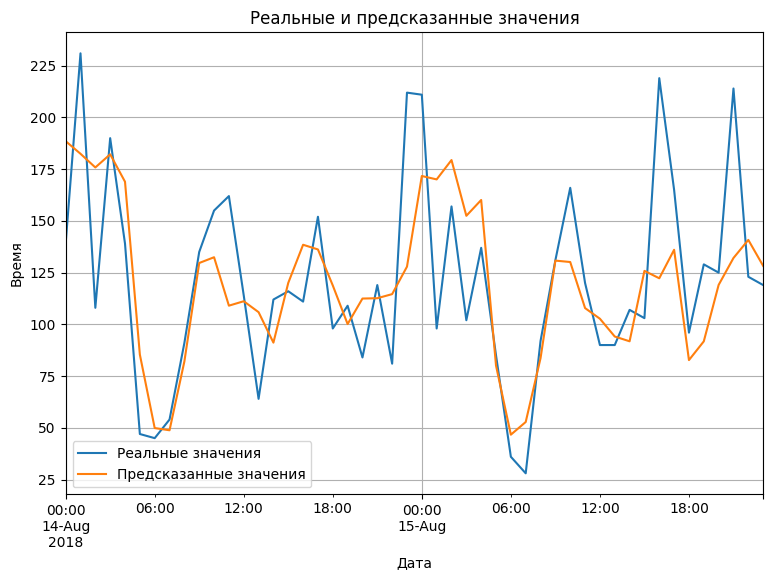

In [37]:
pd.DataFrame({
    'Реальные значения': target_test,
    'Предсказанные значения': pred
})['2018-08-14':'2018-08-15'].plot(grid=True, figsize=(9, 6))
plt.title('Реальные и предсказанные значения')
plt.xlabel('Дата')
plt.ylabel('Время')
plt.show()

---

---

**Промежуточный вывод:**

**Провели проверку на тестовых данных, RMSE немного ухудшилась, но все еще на хорошем уровне.**

**Построили график сравнения реальных и полученных значений, по нему делаем выводы:**
- предсказания имеют высокую точность в случаях маленького колличества заказов
- на средних значениях кол-ва заказов модель показывает приемлимую точность
- в случае кратковременного повышения колличества заказов модель менее точна


---

---

## Общий вывод

---

---

**Мы провели исследование с целью спрогнозировать количество заказов такси на следующий час, чтобы привлекать больше водителей в период пиковой нагрузки.**

**В ходе исследования мы проделали такие шаги:**
- исследование исторических данных
- ресемплирование данных по 1-му часу
- исследовали разные виды сезонности и учли их
- применили 3 модели машинного обучения и проверили результаты на тренировочных данных
- выбрали лучшую и провели финальную проверку на тестовых данных

**Нашли несколько особенностей:**
- максимум заказов с 21:00 до 03:00, можно предположить - это связано с отсутствием общественного транспорта в это время суток
- с 05:00 до 07:00 заказов минимум, предполагаем - люди преимущественно спят
- в течении дня среднее кол-во заказов с небольшими отклонениями
- в ПН и ПТ кол-во заказов сильно выше чем в другие дни
- во ВТ и ВС самое низкое кол-во заказов

**В результате исследования, выяснили, что лучше всех себя показывает модель - случайный лес, рекомендуется в дальнейшем использовать ее.**